In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

In [2]:
print df.head(5)

print 

print df[140:145]

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
140  2  5   sep  mon  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.47
141  1  2   aug  wed  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.55
142  8  6   aug  fri  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.61
143  1  2   jul  sat  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.71
144  2  5   aug  wed  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0  0.77


In [3]:
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [4]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [5]:
# [Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.
sdf = df[['X', 'Y', 'area']]
print sdf.head(5)
print 
print sdf[140:145]

# Answer : (6,5), (8,6), (7,4), (2,2), (4,4)

   X  Y  area
0  7  5   0.0
1  7  4   0.0
2  7  4   0.0
3  8  6   0.0
4  8  6   0.0

     X  Y  area
140  2  5  0.47
141  1  2  0.55
142  8  6  0.61
143  1  2  0.71
144  2  5  0.77


In [7]:
area_sdf=sdf.groupby(['X','Y'])
area_sdf=area_sdf.sum()
area_sdf

area
X Y         
1 2   219.94
  3   157.14
  4   150.28
  5   115.47
2 2   462.65
  3     0.00
  4   143.37
  5    92.63
3 3     6.58
  4   126.35
  5     2.18
  6     0.00
4 3   172.88
  4   397.43
  5   287.01
  6    87.73
5 4    73.75
  5     0.00
  6    17.62
6 3   192.78
  4   144.47
  5  1384.05
  6     8.59
7 3    27.35
  4   474.37
  5    77.39
  6    86.45
8 3    26.31
  4    12.18
  5     2.93
  6  1265.30
  8   185.76
9 4   185.61
  5     8.16
  6    42.87
  9     4.47

In [10]:
area_sdf.sort('area',ascending=False).head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,,area
X,Y,
6,5,1384.05
8,6,1265.30
7,4,474.37
2,2,462.65
4,4,397.43


In [11]:
#[Mission 2] 불이 가장 많이 발생한 월 (month) 상위 2개 및 가장 많이 발생한 날 (day) 상위 2개를 제시하시오.
sdf = df[['month', 'area']]
print sdf.head()
print
print sdf[140:145]

# Answer : (가장많이 발생한 Month) -> 9월, 8월
#          (가장많이 발생한 Day)   -> 토, 목

  month  area
0   mar   0.0
1   oct   0.0
2   oct   0.0
3   mar   0.0
4   mar   0.0

    month  area
140   sep  0.47
141   aug  0.55
142   aug  0.61
143   jul  0.71
144   aug  0.77


In [13]:
sdf = df[['day', 'area']]
day_sdf=sdf.groupby('day')
day_sdf.sum().sort('area',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,area
day,
sat,2144.86
thu,997.10
sun,959.93
tue,807.79
mon,706.53
wed,578.60
fri,447.24


In [12]:
month_sdf=sdf.groupby('month')
month_sdf.sum().sort('area',ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,area
month,
sep,3086.13
aug,2297.99
jul,459.83
mar,235.26
feb,125.50
dec,119.97
oct,99.57
jun,99.30
apr,80.02


In [22]:
#[Mission 3] 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
sdf = df[['temp', 'RH', 'wind', 'rain']]
print sdf.head()

# Answer : 비는 거의 내리지않으나, 습도가 50% 수준이 가장 많았다

   temp  RH  wind  rain
0   8.2  51   6.7   0.0
1  18.0  33   0.9   0.0
2  14.6  33   1.3   0.0
3   8.3  97   4.0   0.2
4  11.4  99   1.8   0.0


In [21]:
sdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


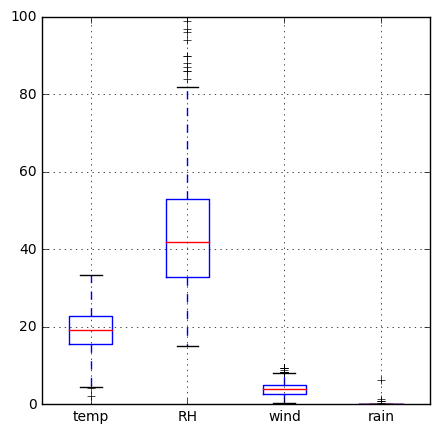

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sdf.boxplot(ax=ax)
plt.show()

In [23]:
#[Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
print sdf.head()
print
print sdf[140:145]

# Answer : 4대 요인과 화재 관련성 없음, 비가 많이 온 날에도 화재는 났었다.

   temp  RH  wind  rain  area
0   8.2  51   6.7   0.0   0.0
1  18.0  33   0.9   0.0   0.0
2  14.6  33   1.3   0.0   0.0
3   8.3  97   4.0   0.2   0.0
4  11.4  99   1.8   0.0   0.0

     temp  RH  wind  rain  area
140  21.9  39   1.8   0.0  0.47
141  23.3  31   4.5   0.0  0.55
142  21.2  51   8.9   0.0  0.61
143  16.6  53   5.4   0.0  0.71
144  23.8  32   5.4   0.0  0.77


In [24]:
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
print sdf.head()
print
print sdf[140:145]

   temp  RH  wind  rain  area
0   8.2  51   6.7   0.0   0.0
1  18.0  33   0.9   0.0   0.0
2  14.6  33   1.3   0.0   0.0
3   8.3  97   4.0   0.2   0.0
4  11.4  99   1.8   0.0   0.0

     temp  RH  wind  rain      area
140  21.9  39   1.8   0.0  0.385262
141  23.3  31   4.5   0.0  0.438255
142  21.2  51   8.9   0.0  0.476234
143  16.6  53   5.4   0.0  0.536493
144  23.8  32   5.4   0.0  0.570980


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
sdf

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.000000
1,18.0,33,0.9,0.0,0.000000
2,14.6,33,1.3,0.0,0.000000
3,8.3,97,4.0,0.2,0.000000
4,11.4,99,1.8,0.0,0.000000
5,22.2,29,5.4,0.0,0.000000
6,24.1,27,3.1,0.0,0.000000
7,8.0,86,2.2,0.0,0.000000
8,13.1,63,5.4,0.0,0.000000
9,22.8,40,4.0,0.0,0.000000


In [28]:
sdf_a=sdf[sdf['area']>=0.5]
sdf_a=sdf[sdf['area']<0.5]
print sdf_a
print sdf_b

     temp  RH  wind  rain      area
0     8.2  51   6.7   0.0  0.000000
1    18.0  33   0.9   0.0  0.000000
2    14.6  33   1.3   0.0  0.000000
3     8.3  97   4.0   0.2  0.000000
4    11.4  99   1.8   0.0  0.000000
5    22.2  29   5.4   0.0  0.000000
6    24.1  27   3.1   0.0  0.000000
7     8.0  86   2.2   0.0  0.000000
8    13.1  63   5.4   0.0  0.000000
9    22.8  40   4.0   0.0  0.000000
10   17.8  51   7.2   0.0  0.000000
11   19.3  38   4.0   0.0  0.000000
12   17.0  72   6.7   0.0  0.000000
13   21.3  42   2.2   0.0  0.000000
14   26.4  21   4.5   0.0  0.000000
15   22.9  44   5.4   0.0  0.000000
16   15.1  27   5.4   0.0  0.000000
17   16.7  47   4.9   0.0  0.000000
18   15.9  35   4.0   0.0  0.000000
19    9.3  44   4.5   0.0  0.000000
20   18.3  40   2.7   0.0  0.000000
21   19.1  38   2.7   0.0  0.000000
22   21.0  44   4.5   0.0  0.000000
23   19.5  43   5.8   0.0  0.000000
24   23.7  32   5.8   0.0  0.000000
25   16.3  60   5.4   0.0  0.000000
26   19.0  34   5.8   0.0  0

In [32]:
sdf_a.describe()

,temp,RH,wind,rain,area
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,18.577099,44.935115,3.905725,0.012977,0.018586
std,5.276436,17.241567,1.693351,0.097397,0.080190
min,4.200000,15.000000,0.900000,0.000000,0.000000
25%,15.400000,33.000000,2.700000,0.000000,0.000000
50%,18.800000,42.000000,3.600000,0.000000,0.000000
75%,21.875000,54.000000,5.275000,0.000000,0.000000
max,32.400000,100.000000,8.900000,1.000000,0.476234


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


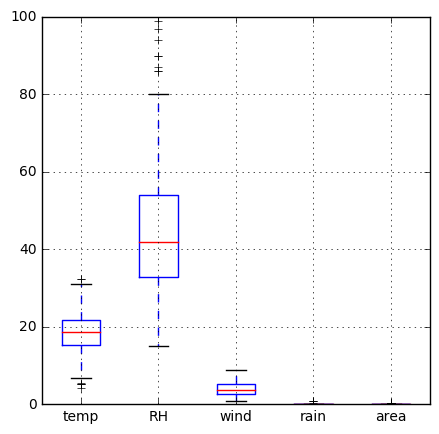

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sdf_a.boxplot(ax=ax)
plt.show()

In [35]:
sdf_b.describe()

,temp,RH,wind,rain,area
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,18.577099,44.935115,3.905725,0.012977,0.018586
std,5.276436,17.241567,1.693351,0.097397,0.080190
min,4.200000,15.000000,0.900000,0.000000,0.000000
25%,15.400000,33.000000,2.700000,0.000000,0.000000
50%,18.800000,42.000000,3.600000,0.000000,0.000000
75%,21.875000,54.000000,5.275000,0.000000,0.000000
max,32.400000,100.000000,8.900000,1.000000,0.476234


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


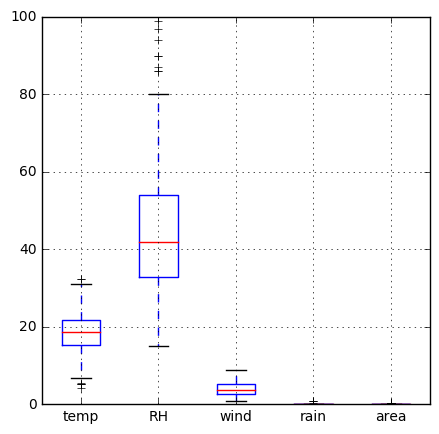

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sdf_b.boxplot(ax=ax)
plt.show()

[Mission 5] 가장 영향이 높은 속성을 선택하여 단일변수 선형 회귀분석 수행

--> 선형 회귀식 : 0.0014662602 * x + 0.948458000687

In [22]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
print sdf.head()
print
print sdf[140:145]

   FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

     FFMC    DMC     DC   ISI  temp  RH  wind  rain      area
140  90.9  126.5  686.5   7.0  21.9  39   1.8   0.0  0.385262
141  95.5   99.9  513.3  13.2  23.3  31   4.5   0.0  0.438255
142  90.1  108.0  529.8  12.5  21.2  51   8.9   0.0  0.476234
143  90.0   51.3  296.3   8.7  16.6  53   5.4   0.0  0.536493
144  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0  0.570980


//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
a = [1, 2, 3, 4, 5]
b = [2, 5, 9, 1, 2]
print np.corrcoef(a, b)
print
corr = np.corrcoef(a, b)[0][1]
print corr

[[ 1.        -0.1933473]
 [-0.1933473  1.       ]]

-0.193347297809


In [25]:
print "FFMC : ", np.corrcoef(sdf['FFMC'],sdf['area'])[0][1]
print "DMC : ",  np.corrcoef(sdf['DMC'],sdf['area'])[0][1]
print "DC : ", np.corrcoef(sdf['DC'],sdf['area'])[0][1]
print "ISI : ",  np.corrcoef(sdf['ISI'],sdf['area'])[0][1]
print "temp : ", np.corrcoef(sdf['temp'],sdf['area'])[0][1]
print "RH : ",np.corrcoef(sdf['RH'],sdf['area'])[0][1]
print "wind : ",  np.corrcoef(sdf['wind'],sdf['area'])[0][1]
print "rain : ", np.corrcoef(sdf['rain'],sdf['area'])[0][1]

FFMC :  0.0467985636765
DMC :  0.067152739815
DC :  0.0663597559672
ISI :  -0.0103468786823
temp :  0.0534865489928
RH :  -0.0536621582829
wind :  0.0669734892516
rain :  0.0233113126564


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['DMC'].values, sdf['area'].values)

In [27]:
format = "%40s: %12.10f"
print format % ("slope", slope)
print format % ("intercept", intercept)
print format % ("r_value (Correlation Coefficient)", r_value)
print format % ("r-squared (Coefficient of Determination)", r_value**2)
print format % ("p_value (Hyperthesis Testing)", p_value)
print format % ("std_err (Standard Error)", std_err)

                                   slope: 0.0014662602
                               intercept: 0.9484580687
       r_value (Correlation Coefficient): 0.0671527398
r-squared (Coefficient of Determination): 0.0045094905
           p_value (Hyperthesis Testing): 0.1272789811
                std_err (Standard Error): 0.0009599801


[Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [29]:
X = zip(sdf['DMC'],sdf['wind'])
print X
y = sdf['area'].values

[(26.199999999999999, 6.7000000000000002), (35.399999999999999, 0.90000000000000002), (43.700000000000003, 1.3), (33.299999999999997, 4.0), (51.299999999999997, 1.8), (85.299999999999997, 5.4000000000000004), (88.900000000000006, 3.1000000000000001), (145.40000000000001, 2.2000000000000002), (129.5, 5.4000000000000004), (88.0, 4.0), (88.0, 7.2000000000000002), (73.200000000000003, 4.0), (70.799999999999997, 6.7000000000000002), (126.5, 2.2000000000000002), (133.30000000000001, 4.5), (141.19999999999999, 5.4000000000000004), (35.799999999999997, 5.4000000000000004), (32.799999999999997, 4.9000000000000004), (27.899999999999999, 4.0), (27.399999999999999, 4.5), (129.5, 2.7000000000000002), (78.5, 2.7000000000000002), (96.299999999999997, 4.5), (110.90000000000001, 5.7999999999999998), (139.40000000000001, 5.7999999999999998), (142.40000000000001, 5.4000000000000004), (117.90000000000001, 5.7999999999999998), (126.5, 1.3), (145.40000000000001, 2.7000000000000002), (149.30000000000001, 3.6

In [30]:
regr = regr.fit(X, y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.00163849  0.05844475]
Intercept: 0.694554883429


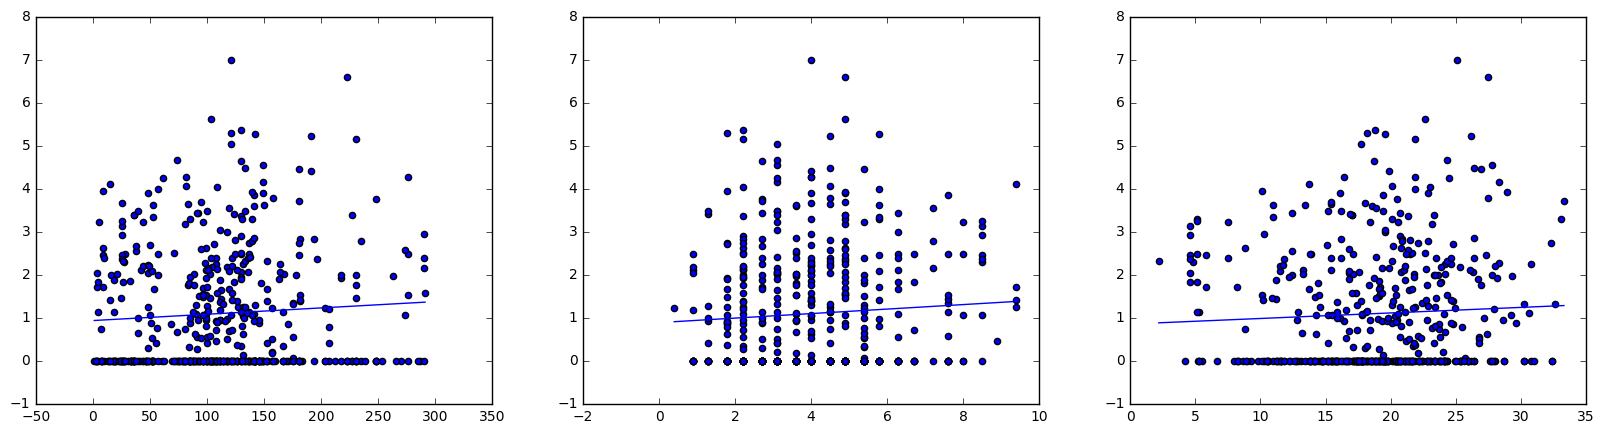

In [32]:
fig = plt.figure(figsize=(20, 5))
var1= fig.add_subplot(131)
var1.scatter(sdf['DMC'], sdf['area'])
line_plot_x1 = np.linspace(sdf['DMC'].min(), sdf['DMC'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['DMC'].values, sdf['area'].values)
var1.plot(line_plot_x1, intercept + slope * line_plot_x1)

var2 = fig.add_subplot(132)
var2.scatter(sdf['wind'], sdf['area'])
line_plot_x2 = np.linspace(sdf['wind'].min(), sdf['wind'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['wind'].values, sdf['area'].values)
var2.plot(line_plot_x2, intercept + slope * line_plot_x2)

var3 = fig.add_subplot(133)
var3.scatter(sdf['temp'], sdf['area'])
line_plot_x3 = np.linspace(sdf['temp'].min(), sdf['temp'].max(), 10)
slope, intercept, r_value, p_value, std_err = stats.linregress(sdf['temp'].values, sdf['area'].values)
var3.plot(line_plot_x3, intercept + slope * line_plot_x3)

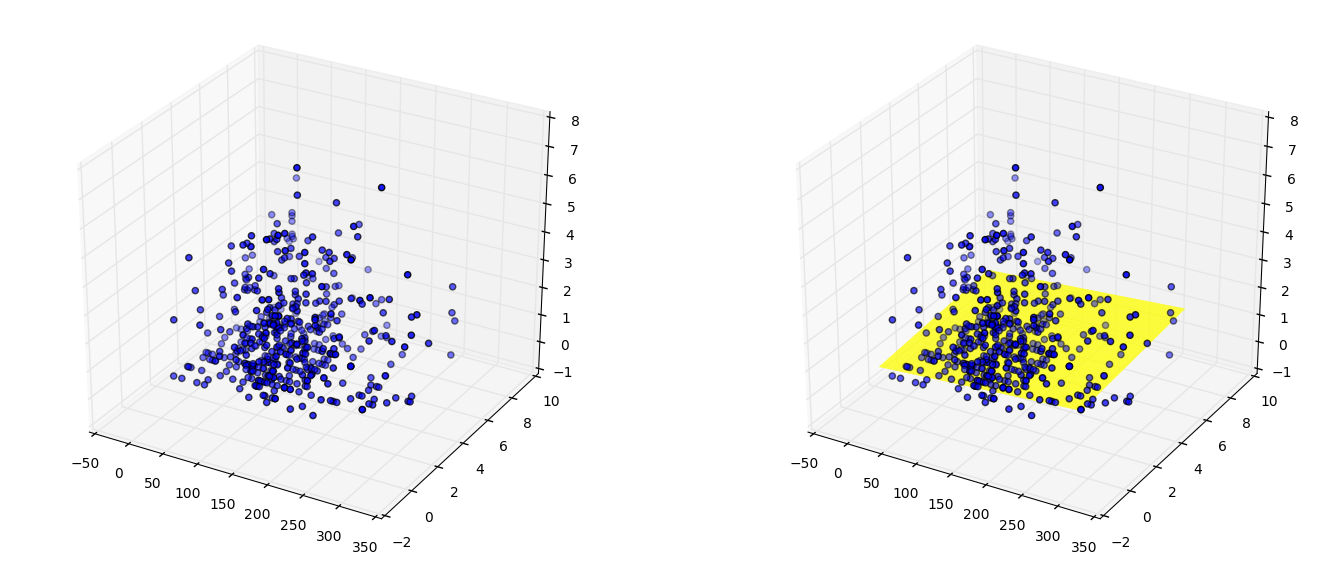

In [37]:
#1
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(17, 7))
var1 = fig.add_subplot(121, projection='3d')
var1.scatter(sdf['DMC'], sdf['wind'], sdf['area'])

var2 = fig.add_subplot(122, projection='3d')
var2.scatter(sdf['DMC'], sdf['wind'], sdf['area'])

#2
xx, yy = np.meshgrid(range(int(sdf['DMC'].min()), int(sdf['DMC'].max())), range(int(sdf['wind'].min()), int(sdf['wind'].max())))

# 3
z = 0.694554883429 + 0.00163849 *xx + 0.05844475* yy
var2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0, color="yellow", shade=False)

[Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행

In [38]:
sdf = df[['DMC', 'wind',  'area']]
sdf['area'] = np.log1p(sdf['area'])
sdf

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,DMC,wind,area
0,26.2,6.7,0.000000
1,35.4,0.9,0.000000
2,43.7,1.3,0.000000
3,33.3,4.0,0.000000
4,51.3,1.8,0.000000
5,85.3,5.4,0.000000
6,88.9,3.1,0.000000
7,145.4,2.2,0.000000
8,129.5,5.4,0.000000
9,88.0,4.0,0.000000


In [39]:
sdf['fire']=sdf['area'].map(lambda x: 1 if x >0.5 else 0)
sdf

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,DMC,wind,area,fire
0,26.2,6.7,0.000000,0
1,35.4,0.9,0.000000,0
2,43.7,1.3,0.000000,0
3,33.3,4.0,0.000000,0
4,51.3,1.8,0.000000,0
5,85.3,5.4,0.000000,0
6,88.9,3.1,0.000000,0
7,145.4,2.2,0.000000,0
8,129.5,5.4,0.000000,0
9,88.0,4.0,0.000000,0


In [40]:
attributes = sdf.iloc[:, 0:2]
area_data = attributes.values
area_data

array([[  26.2,    6.7],
       [  35.4,    0.9],
       [  43.7,    1.3],
       ..., 
       [  56.7,    6.7],
       [ 146. ,    4. ],
       [   3. ,    4.5]])

In [41]:
target_series = sdf.iloc[:, 3]
area_target = target_series.values
area_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0,

In [42]:
regr = linear_model.LogisticRegression()
regr.fit(area_data, area_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [[ 0.00164656  0.07239864]]
Intercept: [-0.49668283]


In [44]:
predicted = []
for i in range(0, len(area_data)):
    predicted.append(regr.predict(area_data[i]))

sdf.loc[:,'predicted'] = predicted
sdf

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda

,DMC,wind,area,fire,predicted
0,26.2,6.7,0.000000,0,1
1,35.4,0.9,0.000000,0,0
2,43.7,1.3,0.000000,0,0
3,33.3,4.0,0.000000,0,0
4,51.3,1.8,0.000000,0,0
5,85.3,5.4,0.000000,0,1
6,88.9,3.1,0.000000,0,0
7,145.4,2.2,0.000000,0,0
8,129.5,5.4,0.000000,0,1
9,88.0,4.0,0.000000,0,0


In [48]:
numTrue  = 0
for i in range(0, len(area_data)):
    if predicted[i] == area_target[i]:
        numTrue  += 1
        
print float(i) / len(area_data)

0.998065764023
